In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
from src import configuration_nb

In [490]:
df = pd.read_csv('new_data.csv')

In [491]:
df2 = df.drop(columns = ['Year/Month', 'Unnamed: 0'])

In [492]:
#df2 = df2[df2['Country_Code'] == 'SSD']

In [493]:
df3 = pd.get_dummies(df2, columns = ['Country_Code', 'month'])

In [494]:
X = df3.drop(columns = 'fatalities')
y = df3.fatalities

In [495]:
#X = df3[['G-P Nodes', 'G-I Nodes', 'B-N Degree','N-P Degree']]
#y = df3.fatalities

In [496]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,
                                                random_state=2)

## Decision Tree

In [497]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [498]:
from sklearn.metrics import confusion_matrix, mean_squared_error

In [499]:
kfold = KFold(n_splits = 10, random_state=1)

In [500]:
model = DecisionTreeRegressor(max_depth=5)

In [501]:
result = cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')

In [502]:
result.mean()

-12520.480707523235

In [503]:
X.shape

(164, 54)

## Bagging

In [504]:
bagged = RandomForestRegressor(max_features=4,n_estimators = 1000,
                                     random_state=1)
bagged.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [505]:
pred = bagged.predict(X_test)

In [506]:
mean_squared_error(y_test,pred)

5748.36943084

In [507]:
y_test.mean()

95.3

In [508]:
mean_squared_error(y_test,[y_train.mean()]*len(y_test)) # Number to Beat!

8394.950969529084

## Random Forest

In [487]:
random = RandomForestRegressor(max_features = 15,
                                            n_estimators = 500,
                                            random_state = 1)
random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [488]:
mean_squared_error(y_test,random.predict(X_test))

9474.02448307692

In [489]:
Importance = pd.DataFrame({'Importance':random.feature_importances_*100},
                         index = X.columns)
Importance.sort_values(by='Importance', ascending=False)

,Importance
G-P Nodes,10.106285
12,9.073926
N-N Degree,7.066878
18,6.173660
N-N Nodes,5.028246
20,4.878444
7,4.658591
1,4.304347
G-N Degree,4.192208
G-N Nodes,4.012486


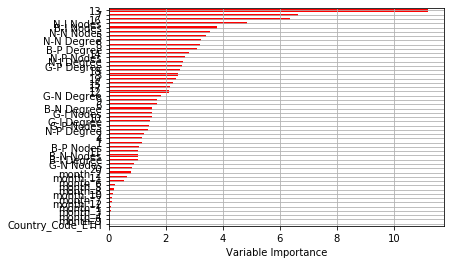

In [421]:
Importance.sort_values(by = 'Importance',axis = 0,ascending = True)\
                      .plot(kind = 'barh',color='r',)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

## Round 2

Adjust regressor evaluating with kfolds

In [422]:
random = RandomForestRegressor(max_features = 4,
                                            n_estimators = 500,
                                            random_state = 1)
random.fit(X_train,y_train)

mean_squared_error(y_test,random.predict(X_test))

5905.345235076922

In [423]:
model = RandomForestRegressor(max_features = 6,
                                            n_estimators = 500,
                                            random_state = 1)

In [424]:
result = cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')

In [425]:
result.mean()

-3353.73218872

In [426]:
(-result.mean()) ** (1/2)

57.911416739016154

## Ridge Regression

In [427]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [428]:
alphas = np.linspace(10,-2,100)

In [429]:
alphas = 10**alphas

In [430]:
model = Ridge(normalize = True)

In [431]:
coefs = []

In [432]:
for a in alphas:
    model.set_params(alpha = a)
    model.fit(X,y)
    coefs.append(model.coef_)

In [433]:
df = pd.DataFrame(coefs)

In [434]:
df.columns = X.columns

In [435]:
len(X.columns)

51

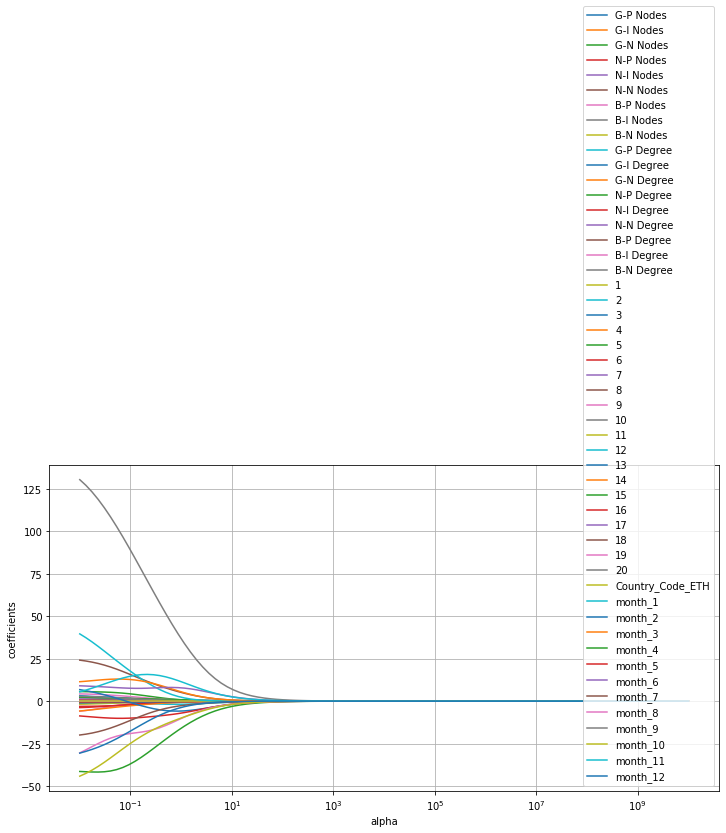

In [436]:
# Plot Coefficients vs Alphas
plt.figure(figsize=(12,6))
ax = plt.gca()

for i in range(len(X.columns)):
    aux = np.array(coefs)[:,i]
    ax.plot(alphas,aux,label = X.columns.values[i])
    ax.set_xscale('log')

plt.legend(loc=4)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.grid()

In [437]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train,y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [438]:
pd.DataFrame(ridge2.coef_,index = X.columns)

,0
G-P Nodes,0.114943
G-I Nodes,0.015738
G-N Nodes,-0.040073
N-P Nodes,-0.167585
N-I Nodes,0.057329
N-N Nodes,-0.027731
B-P Nodes,0.244918
B-I Nodes,0.149461
B-N Nodes,-0.042646
G-P Degree,-0.563958


In [439]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error',
                 normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [440]:
ridgecv.alpha_

10000000000.0

In [441]:
ridge2 = Ridge(alpha = ridgecv.alpha_, normalize=True)
ridge2.fit(X_train,y_train)
mean_squared_error(y_test,ridge2.predict(X_test))

5656.259517275259

## Lasso Regression

In [442]:
lassocv = LassoCV(alphas=alphas,cv=10,max_iter=10000,normalize=True)
lassocv.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [443]:
lasso_model = Lasso(max_iter = 10000, normalize = True)
lasso_model.set_params(alpha = lassocv.alpha_)
lasso_model.fit(X_train,y_train)

Lasso(alpha=10000000000.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [444]:
mean_squared_error(y_test,lasso_model.predict(X_test))

5656.259517268447

In [445]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(mean_squared_error)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
m3 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
m3.fit(X_train, y_train)

C:\Users\ssq10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ssq10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [350]:
mean_squared_error(y_test,m3.predict(X_test))

8993.184092077665